
<ul>
<li>Name: Abhishek V Sutrave</li> 
<li>Batch: MARCH P-1</li>
<li>Role:Data Science Intern</li>
<li>Company:OASIS INFOBYTE</li>
<li>TASK4: EMAIL SPAM DETECTION WITH MACHINE LEARNING</li>

<li>Objective: -Utilize Machine Learning techniques so that it can accurately      
            categorize emails.

-Develop an Email Spam Detection System.</li>
</ul>

In [2]:
#Importing required libraries 
import pandas as pd
import numpy as np
#Importing warning modules
import warnings
warnings.simplefilter('ignore')
#Importing necessary function to split data into training and testing sets
from sklearn.model_selection import train_test_split
#Bringing in visualisation libraries for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:

#Reading the CSV file into a Dataframe
import pandas as pd

# Load the dataset
data__3= pd.read_csv(r"C:/Users/Abhishek/Desktop/OASIS INFOBYTE/spam.csv.csv",encoding='ISO-8859-1')

data__3.head(4)



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


### Conducting a descriptive analysis to understand the variables and their associated values

In [66]:
 #Examining the dataset's dimensions

data__3.shape

(5572, 5)

In [11]:
#Display datset information
data__3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
#Display column names
print(data__3.columns)

Index(['Category', 'Message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [13]:
#verifying for duplicate entries in dataset
data__3.duplicated().sum()


np.int64(403)

In [14]:
#Checking for missing values in the dataset
data__3.isna().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [15]:
#Dropping dulicate rows 
data__3.drop_duplicates(keep='first',inplace=True)
data__3.shape

(5169, 5)

In [16]:
#Dropping irrelevant columns from the Dtaframe using their names
data__3.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
#Displaying the first few record after cleaning up the columns
data__3.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#Analyzing the frequency of spam and non spam mails
spam=data__3['v1'].value_counts()
print(spam)

v1
ham     4516
spam     653
Name: count, dtype: int64


0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object


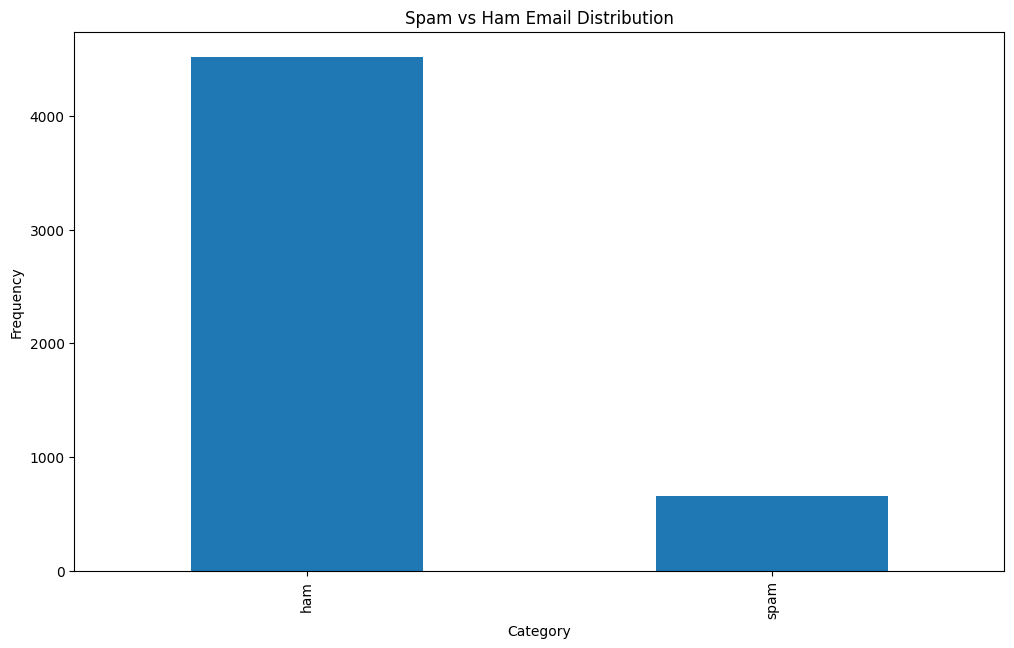

In [18]:
#Plotting the frequency of spam and ham emails in bar chart 
data__3['v1'].value_counts().plot(kind='bar',figsize=(12,7),title="Spam vs Ham Email Distribution",xlabel="Category",ylabel="Frequency")
print(data__3['v1'].head())

In [21]:
#converting spam labels: Spam=1,Non-spam=0
data__3['v1'] = (data__3['v1'] == 'spam').astype(int)
data__3

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [55]:
#Displaying sample spam messages
data__3['v1']=data__3['v1'].map({'spam':1,'ham':0})
print("Examples of detected spam messages:")
print(data__3[data__3['v1'] == 1]['v2'].head())

Examples of detected spam messages:
      v1                                                 v2 Unnamed: 2  \
2      1  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
5      1  FreeMsg Hey there darling it's been 3 week's n...        NaN   
8      1  WINNER!! As a valued network customer you have...        NaN   
9      1  Had your mobile 11 months or more? U R entitle...        NaN   
11     1  SIX chances to win CASH! From 100 to 20,000 po...        NaN   
...   ..                                                ...        ...   
5537   1  Want explicit SEX in 30 secs? Ring 02073162414...        NaN   
5540   1  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...        NaN   
5547   1  Had your contract mobile 11 Mnths? Latest Moto...        NaN   
5566   1  REMINDER FROM O2: To get 2.50 pounds free call...        NaN   
5567   1  This is the 2nd time we have tried 2 contact u...        NaN   

     Unnamed: 3 Unnamed: 4  
2           NaN        NaN  
5           NaN  

In [56]:
#Displaying sample non-spam (ham) messages
print("Here are some examples of ham messages:")
print(data__3[data__3['v1'] == 0]['v2'].head())

Here are some examples of ham messages:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: v2, dtype: object


In [4]:
data__3.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [10]:
data__3.tail(6)#Provides last 6 entries

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [12]:
#Returns a boolean series
data__3.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [7]:
data__3.duplicated().sum()

np.int64(403)

In [9]:
#Returns the total number of elements in dataset
data__3.size

27860

In [89]:
data__3.columns=data__3.columns.str.replace("v1","Category").str.replace("v2","Message")

In [90]:
data__3.head()

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


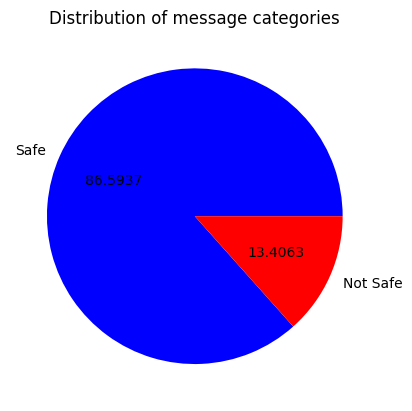

In [91]:
counts= data__3["Category"].value_counts()
plt.pie(counts, labels=["Safe" ,"Not Safe"],autopct="%0.4f", colors=["blue","red"])
plt.title("Distribution of message categories")
plt.show()

### Developing the Model

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
#Here the predictors represent mails and response denotes whether email is spam or ham
predictors=data__3["v2"]
response=data__3["v1"]

In [11]:
#Dividing the dataset into training and testing sets for model evaluation
#75% of the data is allocated for training 
T_train,T_test,z_train,z_test=train_test_split(predictors,response,train_size=0.75)
#Displaying the dimensions of the training and testing datasets
print('Training set(input):', T_train.shape)
print('Testing set (input):',T_test.shape)
print('Training set(output):',z_train.shape)
print('Testing set (output):',z_test.shape)

Training set(input): (4179,)
Testing set (input): (1393,)
Training set(output): (4179,)
Testing set (output): (1393,)


### Training the model on training dataset

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [15]:
#Implementing the multinomial Naive Bayes model,a supervised learning algorithm
#This model is widely used for classifying categorical text data
text_classifier =MultinomialNB()

In [16]:
#Intialising countVectorizer
cv=CountVectorizer()
#Countvectorizer converts text data into numerical vector
#It represents text based on the frequency of words appearing in dataset
#Transforming the training dataset into a numerical vector format
T_train_vector =cv.fit_transform(T_train.values)
#Converting sparse matrix to an array for further analysis
T_train_vector.toarray()



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
#Training the Multinomial Naive Bayes model using the transformed training dataset
#The model learns patterns from the training data to classify text effectively
text_classifier.fit(T_train_vector,z_train)

MultinomialNB()

In [18]:
#Converting words in the test dataset into numerical vectors
#Using the same CountVectorizer instance to ensure consistency
T_test_vector=cv.transform(T_test.values)
T_test_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Estimation

In [19]:
#Using the trained model to predict whether emails in the test dataset are spam or not
#Predictions are made on transformed test values 
z_pred=text_classifier.predict(T_test_vector)
z_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

### Evaluating the model

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
#Generating the confusion matrix
conf_matrix=confusion_matrix(z_test,z_pred)
print("Confusion Matrix:\n",conf_matrix)

Confusion Matrix:
 [[1203    5]
 [  13  172]]


In [22]:
#Generating a detailed classification report
class_report=classification_report(z_test,z_pred)
print("Classification Report:\n",class_report)

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1208
        spam       0.97      0.93      0.95       185

    accuracy                           0.99      1393
   macro avg       0.98      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [28]:
#Compute balanced accuracy
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy=balanced_accuracy_score(z_test,z_pred)
print("Balanced Accuracy score:",balanced_accuracy)


Balanced Accuracy score: 0.9627953284410238


In [29]:
from sklearn.metrics import precision_score
precision=precision_score(z_test,z_pred,pos_label="spam")
print("Precision:",precision)

Precision: 0.9717514124293786
